<a href="https://colab.research.google.com/github/MBouchaqour/DS_Masjid2024/blob/main/DS3_introduction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1><font color= "blue" size="+3">Welcome to ML in Python</font></h1>
</center>

---

<center>
    <h1><font color="red">Regression Analysis with Scikit-Learn</font></h1>
</center>

## Useful Links

- <a href="https://medium.com/towards-artificial-intelligence/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660">Calculating Simple Linear Regression and Linear Best Fit an In-depth Tutorial with Math and Python</a>
- <a href="https://scikit-learn.org/stable/tutorial/index.html">scikit-learn Tutorials</a>
- <a href="https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a">Sklearn Linear Regression Tutorial with Boston House Dataset</a>
- <a href="https://www.dataquest.io/blog/sci-kit-learn-tutorial/">Scikit-learn Tutorial: Machine Learning in Python</a>
- <a href="https://debuggercafe.com/image-classification-with-mnist-dataset/">Image Classification with MNIST Dataset</a>
- <a href="https://davidburn.github.io/notebooks/mnist-numbers/MNIST%20Handwrititten%20numbers/">MNIST handwritten number identification</a>
- [K-Fold Cross-Validation in Python Using SKLearn](https://www.askpython.com/python/examples/k-fold-cross-validation)

# <font color="red">Scikit-Learn</font>

- Scikit-learn is a free machine learning library for Python.
- Provides a selection of efficient tools for machine learning and statistical modeling including:
     - **Classification:** Identifying which category an object belongs to. Example: Spam detection
     - **Regression:** Predicting a continuous variable based on relevant independent variables. Example: Stock price predictions
     - **Clustering:** Automatic grouping of similar objects into different clusters. Example: Customer segmentation
     - **Dimensionality Reduction:** Seek to reduce the number of input variables in training data by preserving the salient relationships in the data
- Features various algorithms like support vector machine, random forests, and k-neighbours.
- Supports Python numerical and scientific libraries like NumPy and SciPy.


Some popular groups of models provided by scikit-learn include:

- **Clustering:** Group unlabeled data such as KMeans.
- **Cross Validation:** Estimate the performance of supervised models on unseen data.
- **Datasets:** for test datasets and for generating datasets with specific properties for investigating model behavior.
- **Dimensionality Reduction:** Reduce the number of attributes in data for summarization, visualization and feature selection such as Principal component analysis.
- **Ensemble Methods:** Combine the predictions of multiple supervised models.
- **Feature Extraction:** Define attributes in image and text data.
- **Feature Selection:** Identify meaningful attributes from which to create supervised models.
- **Parameter Tuning:** Get the most out of supervised models.
- **Manifold Learning:** Summarize and depicting complex multi-dimensional data.
- **Supervised Models:** A vast array not limited to generalized linear models, discriminate analysis, naive bayes, lazy methods, neural networks, support vector machines and decision trees.
- **Unsupervised Learning Algorithms:** − They include clustering, factor analysis, PCA (Principal Component Analysis), unsupervised neural networks.



## Package Requirements

- Numpy
- scipy
- matplotlib
- pandas
- scikit-learn
- seaborn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [4]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [5]:
print(f"Numpy version:        {np.__version__}")
print(f"Pandas version:       {pd.__version__}")
print(f"Seaborn version:      {sns.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Numpy version:        1.26.4
Pandas version:       2.2.2
Seaborn version:      0.13.1
Scikit-Learn version: 1.5.2


# <font color="blue">Numerical Data</font>

## <font color="red">unkown housing data</font>
- Contains information about different aspects of residential homes.
- There are 1460 observations and 79 feature variables in this dataset.

We want to predict the value of prices of the house using the given features.

### Obtain the Dataset

In [6]:
!curl https://raw.githubusercontent.com/MBouchaqour/DS_Masjid2024/refs/heads/main/housing.csv -o housing.csv
df=pd.read_csv('housing.csv')
df

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  559k  100  559k    0     0  1199k      0 --:--:-- --:--:-- --:--:-- 1200k


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


### Features of the Dataset and First Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


- The target is the `Price` represented in the last column before Address
- 6 columns have numerical values
- 1 column has `object` as data type. Are we going to use it for our analysis?
- If there are missing values. How are we going to treat them?
We can drop the four columns with a lot of missing values if they exist. We also drop the `Address` column.

In [8]:
# Copy the dataframe into new dataframe where I would handle the data.
df_hous=df.copy()
df_hous.drop(['Address'], axis=1, inplace=True)
df_hous.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06


**To facilitate the analysis, we are only going to consider columns with numerical values:**
In our case, we got only columns with numerical values.

## <font color="red">Exploratory Data Analysis</font>

- Important step before training the model.
- We use statistical analysis and visualizations to understand the relationship of the target variable with other features.

#### Obtain basic statistics on the data

In [9]:
df_hous.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562390,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928700,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626584,15938.657920,997577.135075,1.232669e+06,1.471210e+06,2.469066e+06


#### Check Missing Values
It is a good practice to see if there are any missing values in the data.

Count the number of missing values for each feature

In [10]:
df_hous.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0


We can also determine the perecentage of missing values in each column:

In [11]:
total=df_hous.isnull().sum().sort_values(ascending=False)
percent=(df_hous.isnull().sum()/df_hous.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Avg. Area Income,0,0.0
Avg. Area House Age,0,0.0
Avg. Area Number of Rooms,0,0.0
Avg. Area Number of Bedrooms,0,0.0
Area Population,0,0.0
Price,0,0.0


In [12]:
df_hous.shape

(5000, 6)

#### Distribution of the target variable

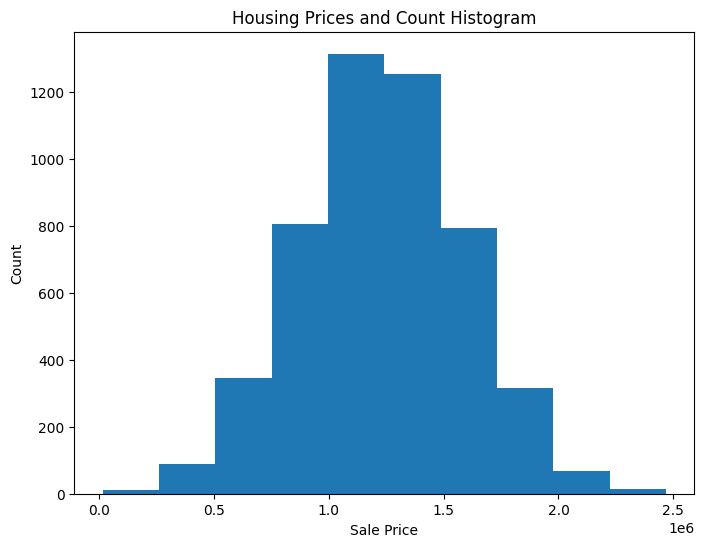

In [15]:
plt.figure(figsize=(8, 6));
plt.hist(df_hous['Price']);
plt.title('Housing Prices and Count Histogram');
plt.xlabel('Sale Price');
plt.ylabel('Count');

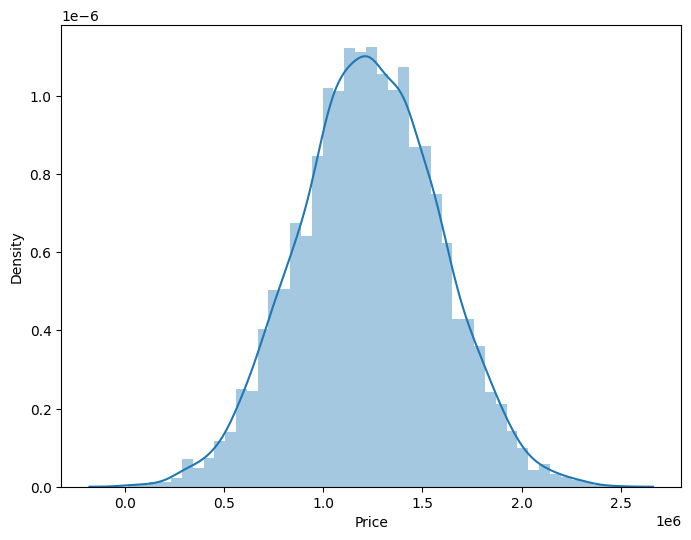

In [16]:
plt.figure(figsize=(8, 6));
sns.distplot(df_hous['Price']);

From the above output we can see that we have a bell curve.

#### Heatmap: Two-Dimensional Graphical Representation
- Represent the individual values that are contained in a matrix as colors.
- Create a correlation matrix that measures the linear relationships between the variables.

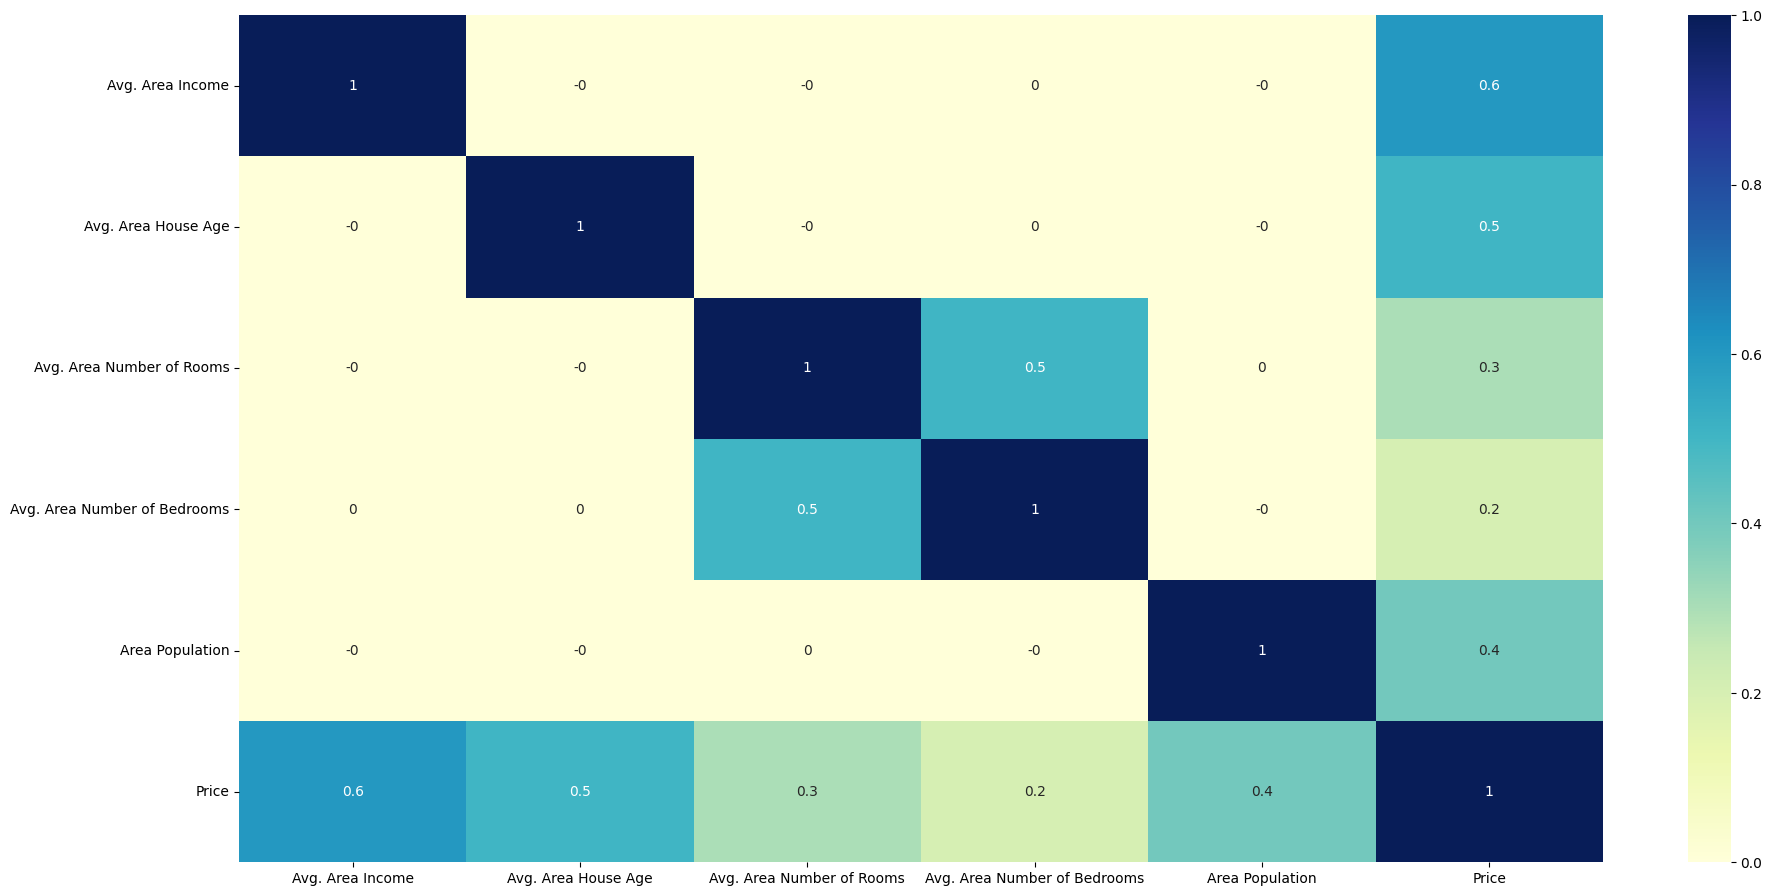

In [17]:
plt.figure(figsize=(22, 11));
correlation_matrix = df_hous.corr().round(1);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

You may choose to select only correlations that verify specific conditions:

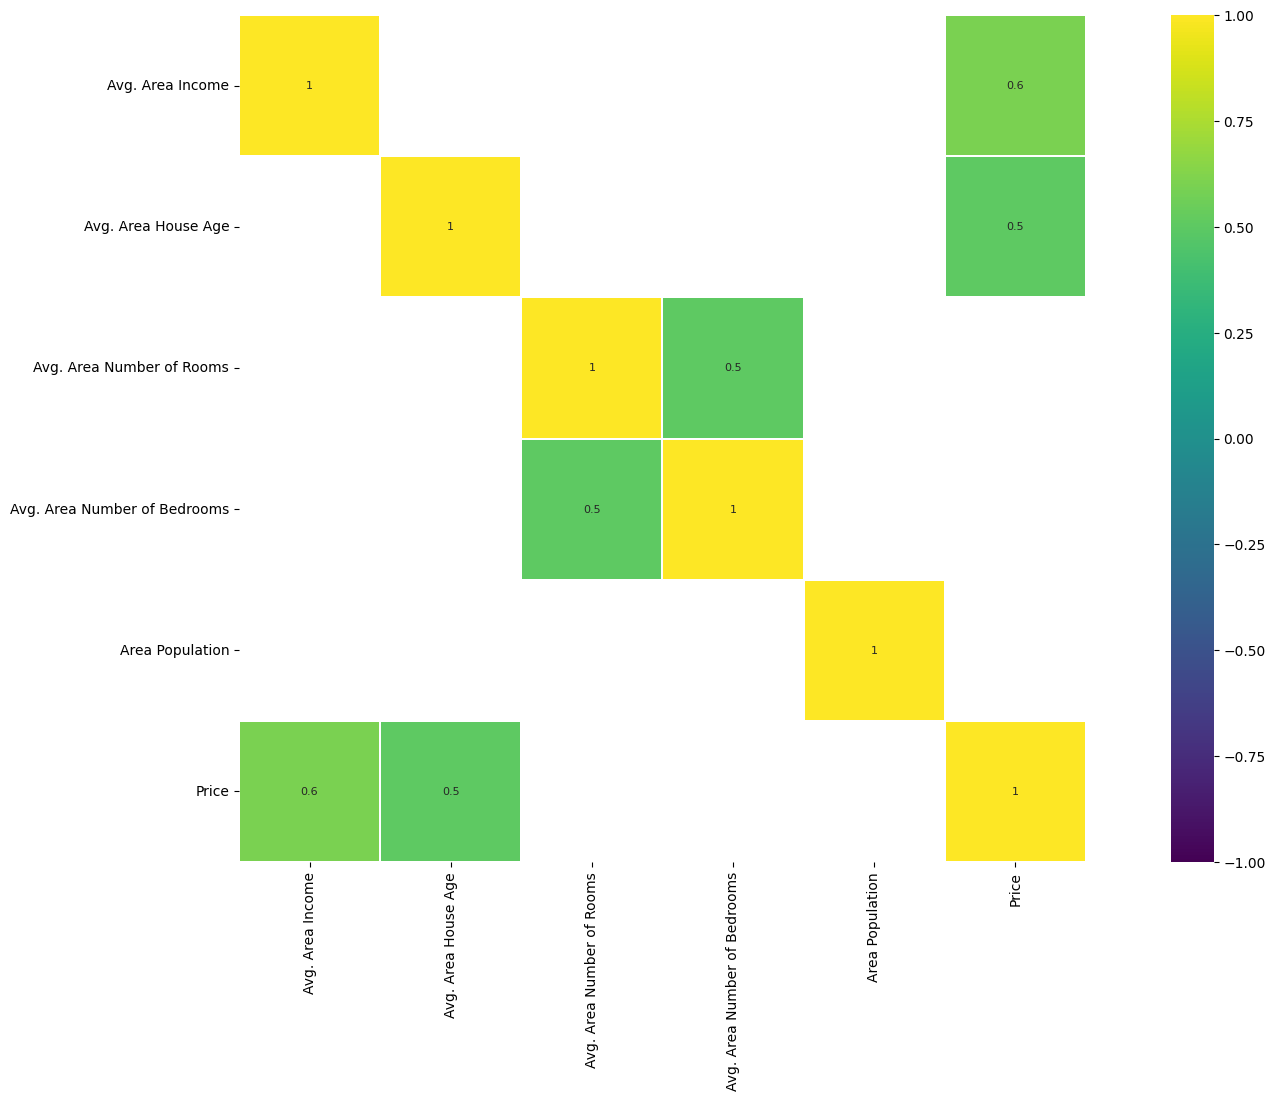

In [18]:
plt.figure(figsize=(22, 11));
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.5) |
                               (correlation_matrix <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

- **Area Income** and **Area House Age** have a strong positive correlation with **Price** (0.6 and 0.5 respectively).
- The features **Area number of bedrooms ** & **are number of rooms**, have a correlation of at least 0.5. These feature pairs are strongly correlated to each other. This can affect the model.
- The predictor variables such as **area of pop**, has a good positive correlation with the target. Any increase of it leads to the increase in the price of the house.

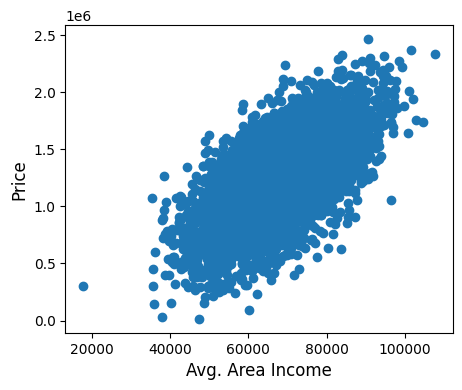

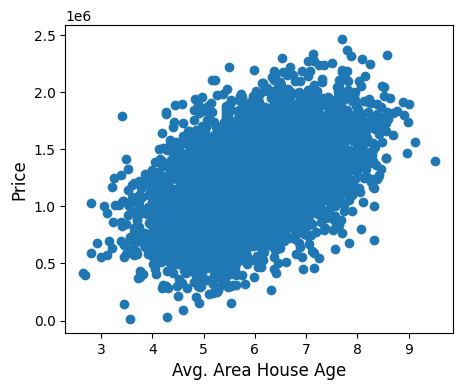

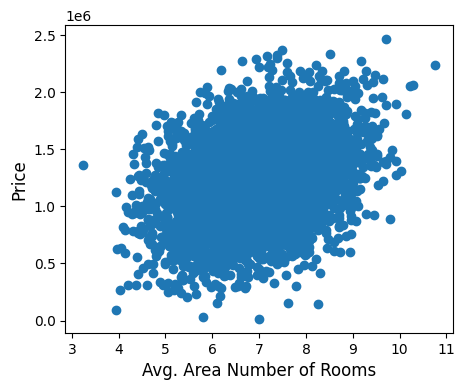

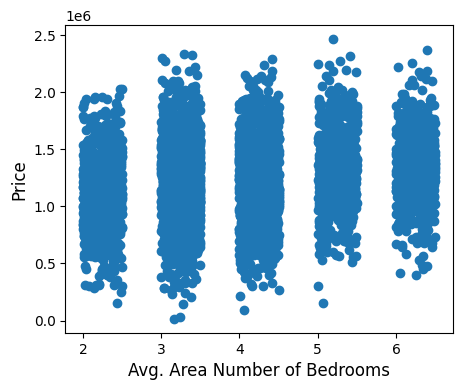

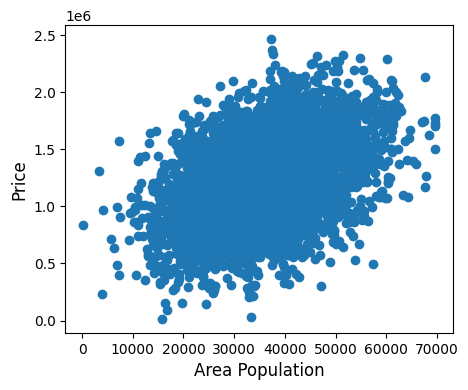

In [20]:
feature_names = df_hous.columns.drop('Price')
for feature_name in feature_names:
    plt.figure(figsize=(5, 4));
    plt.scatter(df_hous[feature_name], df_hous['Price']);
    plt.ylabel('Price', size=12);
    plt.xlabel(feature_name, size=12);
plt.show();

Based on the above observations we will plot an `lmplot` between **Area Income** and **SalePrice** to see the relationship between the two more clearly.

In [25]:
df_hous.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

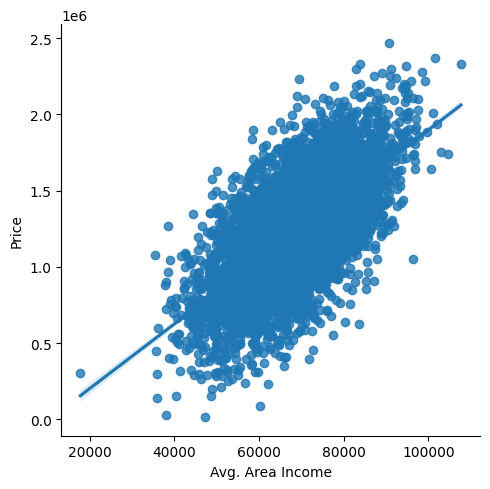

In [26]:
sns.lmplot(x = 'Avg. Area Income', y = 'Price', data = df_hous);

## <font color="blue">Model Selection Process</font>

![fig_skl](https://miro.medium.com/max/1400/1*LixatBxkewppAhv1Mm5H2w.jpeg)
Image Source: Christophe Bourguignat

- A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable.
- We need to divide the entire data set into two sets:
    + Training set on which we are going to train our algorithm to build a model.
    + Testing set on which we will test our model to see how accurate its predictions are.
    
Before we create the two sets, we need to identify the algorithm we will use for our model.
We can use the `machine_learning_map` map (shown at the top of this page) as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category our current dataset falls into:
- We have **1121** samples: >50? (**Yes**)
- Are we predicting a category? (**No**)
- Are we predicting a quantity? (**Yes**)

Based on the checklist that we prepared above and going by the `machine_learning_map` we can try out **regression methods** such as:

- Linear Regression
- Lasso
- ElasticNet Regression
- Ridge Regression:
- K Neighbors Regressor
- Decision Tree Regressor
- Simple Vector Regression (SVR)
- Ada Boost Regressor
- Gradient Boosting Regressor
- Random Forest Regression
- Extra Trees Regressor

Check the following documents on regresssion:
<a href="https://scikit-learn.org/stable/supervised_learning.html">Supervised learning--scikit-learn</a>,
<a href="https://developer.ibm.com/technologies/data-science/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/">Learn regression algorithms using Python and scikit-learn</a>,
<a href="https://www.pluralsight.com/guides/non-linear-">Non-Linear Regression Trees with scikit-learn</a>.

## <font color="red">Simple Linear Model</font>
- It is difficult to visualize the multiple features.
- We want to predict the house price with just one variable and then move to the regression with all features.
- Because **Area Income** shows positive correlation with **Price**, we will use **Area Income** for the model.

In [27]:
x_garage = df_hous['Avg. Area Income']
y_price = df_hous['Price']

X_garage = np.array(x_garage).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

#### Splitting the data into training and testing sets
- We split the data into training and testing sets.
- We train the model with 80% of the samples and test with the remaining 20%.
- We do this to assess the model’s performance on unseen data.

In [28]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = \
             train_test_split(X_garage, y_price,
                              test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(4000, 1)
(4000, 1)
(1000, 1)
(1000, 1)


#### Training and testing the model
- We use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets.
- We check the model performance on the train dataset.

In [29]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 273653.0477602104
R2 score is 0.41


#### Model Evaluation for Test Set

In [30]:
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(metrics.mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 262363.61517423706
R^2: 0.39


What can you say?
Why we did not have in the coefficient of determination 1 as a perfect prediction

In [31]:
print(f'Coefficient of determination: {metrics.r2_score(Y_test_1, y_pred_1) :.4f}')

Coefficient of determination: 0.3897


#### 45-Degree Plot

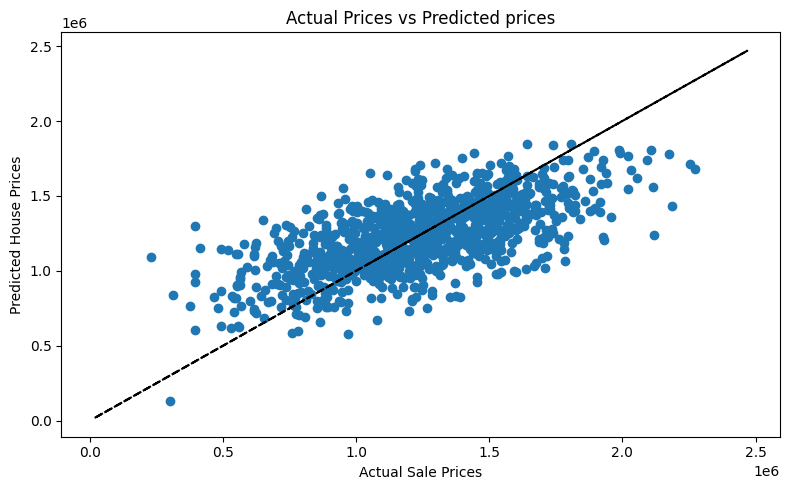

In [32]:
plt.figure(figsize=(8, 5));
plt.scatter(Y_test_1, y_pred_1);
plt.plot(y_price, y_price, '--k');
plt.axis('tight');
plt.xlabel("Actual Sale Prices");
plt.ylabel("Predicted House Prices");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

## <font color="red">Linear Regression Model with All Variables</font>
- We want to create a model considering all the features in the dataset.

#### Create the Model

In [33]:
X=df_hous.drop('Price', axis=1)
y=df_hous['Price']

- Use the `train_test_split` to split the data into random train and test subsets.
- Everytime you run it without specifying `random_state`, you will get a different result.
- If you use `random_state=some_number`, then you can guarantee the split will be always the same.
- It doesn't matter what the value of `random_state` is:  42, 0, 21, ...
- This is useful if you want reproducible results.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

The linear regression model:

In [35]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation for Training Set

In [36]:
y_train_predict = reg_all.predict(X_train)

In [37]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 101273.48551106975
R2 score is 0.92


#### Model Evaluation for Test Set

In [38]:
y_pred = reg_all.predict(X_test)

In [39]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 100444.06054864298
R^2: 0.92


The coefficient of determination: 1 is perfect prediction

In [40]:
print(f'Coefficient of determination: {metrics.r2_score(y_test, y_pred) :.4f}')

Coefficient of determination: 0.9180


#### Error Distribution

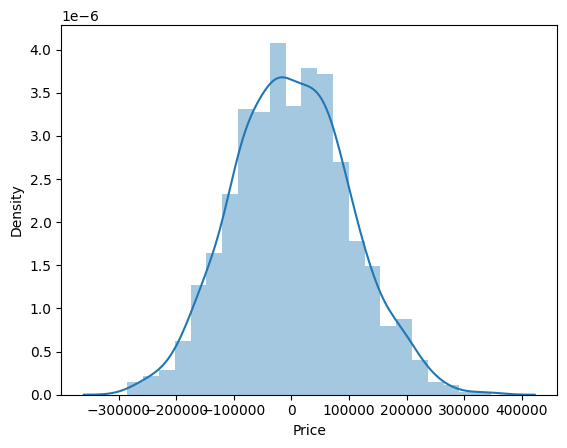

In [41]:
sns.distplot(y_test - y_pred);

#### 45-Degree Plot

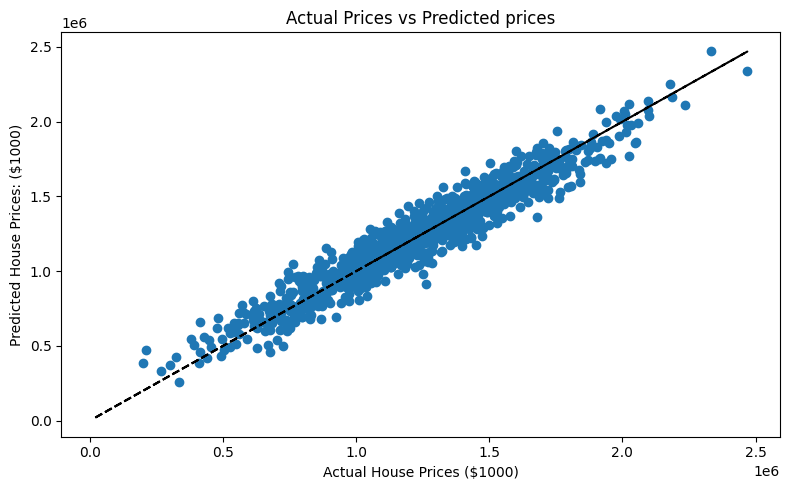

In [42]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred);
plt.plot(y, y, '--k');
plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

In [43]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 100444.06054864298 


In [44]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df1.head(10)
df2

,Actual,Predicted
1501,1339096.077,1.308588e+06
2586,1251794.179,1.237037e+06
2653,1340094.966,1.243429e+06
1055,1431507.623,1.228900e+06
705,1042373.524,1.063321e+06
106,1555320.500,1.544058e+06
589,1250882.292,1.094775e+06
2468,1039380.722,8.332847e+05
2413,832475.189,7.884129e+05
1600,1420648.281,1.469715e+06


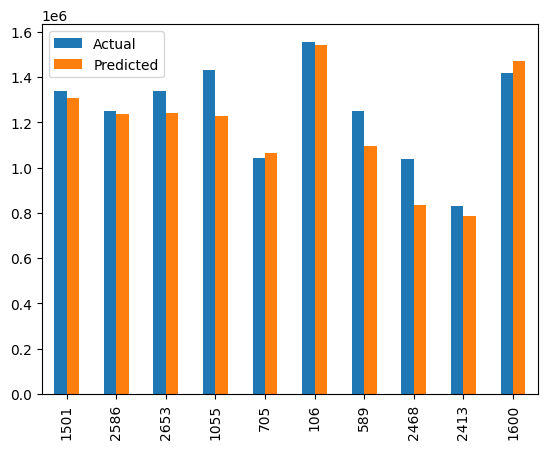

In [45]:
df2.plot(kind='bar');

## <font color="red">Choosing the Best Model:</font> k-Fold Cross-Validation

- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
- It is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.
- We use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.
- The biggest advantage of this method is that every data point is used for validation exactly once and for training `k-1` times.
- To choose the final model to use, **we select the one that has the lowest validation error**.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into `k` groups
3. For each unique group:
       3.1 Take the group as a hold out or test data set
       3.2 Take the remaining k-1 groups as a training data set
       3.3 Fit a model on the training set and evaluate it on the test set
       3.4 Retain the evaluation score and discard the model  
4. Summarize the skill of the model using the sample of model evaluation scores

How to choose **k**?
- A poorly chosen value for **k** may result in a mis-representative idea of the skill of the model, such as a score with a high variance, or a high bias.
- The choice of **k** is usually 5 or 10, but there is no formal rule. As **k** gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.
- A value of **k=10** is very common in the field of applied machine learning, and is recommend if you are struggling to choose a value for your dataset.

Below is the visualization of a k-fold validation when k=5.
![FIG_kFold](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
Image Source: https://scikit-learn.org/



In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
seed    = 9
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed, shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:16.2f}, {:15.2f}".format(model_name, round(results.mean(), 3),
                                  round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure(figsize=(12, 9));
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();

**Based on the above comparison, we can see that `Gradient Boosting Regression` model outperforms all the other regression models:** it has the smallest mean.

## <font color="red">Model with Gradient Boosting Regression</font>


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_predicted = gbr.predict(X_test)
gbr_expected = y_test

**Root Mean Square Error:**

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((gbr_predicted - gbr_expected) ** 2)))

**The coefficient of determination**: (1 is perfect prediction)

In [ ]:
print('Coeff of determination: {:.4f}'.format(metrics.r2_score(gbr_expected, gbr_predicted)))

#### Error Distribution

In [ ]:
sns.distplot(gbr_expected - gbr_predicted);

#### 45-Degree Plot

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(gbr_expected, gbr_predicted)
plt.plot(y, y, '--k');
plt.axis('tight');
plt.xlabel('True price ($1000s)');
plt.ylabel('Predicted price ($1000s)');
plt.tight_layout();

**Zoom in:**

In [ ]:
df1 = pd.DataFrame({'Actual': gbr_expected, 'Predicted': gbr_predicted})
df2 = df1.head(10)
df2

In [ ]:
df2.plot(kind='bar');

#### Feature Importance
- Once we have a trained model, we can understand feature importance (or variable importance) of the dataset which tells us how important each feature is, to predict the target.

In [ ]:
plt.figure(figsize=(20, 11));

feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

np_feature_names = np.array(feature_names)
plt.barh(pos, feature_importance[sorted_idx], align='center');
plt.yticks(pos, np_feature_names[sorted_idx]);
plt.xlabel('Relative Importance');
plt.title('Variable Importance');

**Plot training deviance:**

In [ ]:
n_estimators = 100
# compute test set deviance
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(gbr_expected, y_pred)

plt.figure(figsize=(12, 6));
plt.subplot(1, 1, 1);
plt.title('Deviance');
plt.plot(np.arange(n_estimators) + 1,
         gbr.train_score_, 'b-',
         label='Training Set Deviance');
plt.plot(np.arange(n_estimators) + 1,
         test_score, 'r-',
         label='Test Set Deviance');
plt.legend(loc='upper right');
plt.xlabel('Boosting Iterations');
plt.ylabel('Deviance');